In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [14]:
start = '2010-01-01'
end = date.today()
df=data.DataReader('AAPL','yahoo', start, end)

In [15]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [16]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [17]:
df=df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


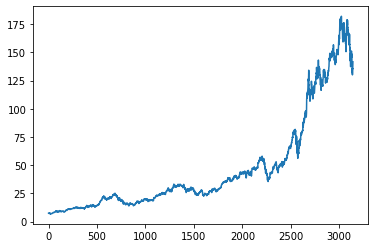

In [18]:

plt.plot(df.Close)

In [19]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3137    159.759601
3138    159.521400
3139    159.282701
3140    158.962101
3141    158.630901
Name: Close, Length: 3142, dtype: float64

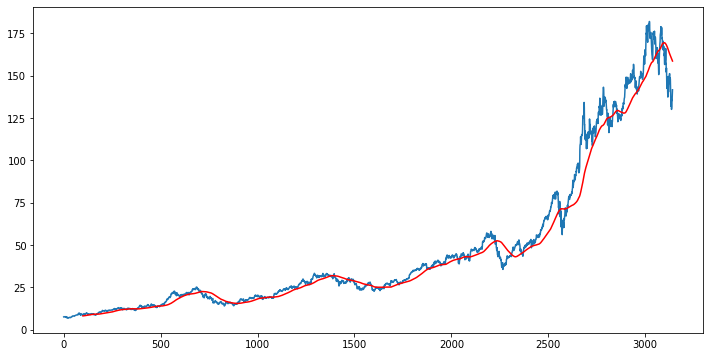

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [21]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3137    158.92730
3138    158.83840
3139    158.74365
3140    158.65155
3141    158.58430
Name: Close, Length: 3142, dtype: float64

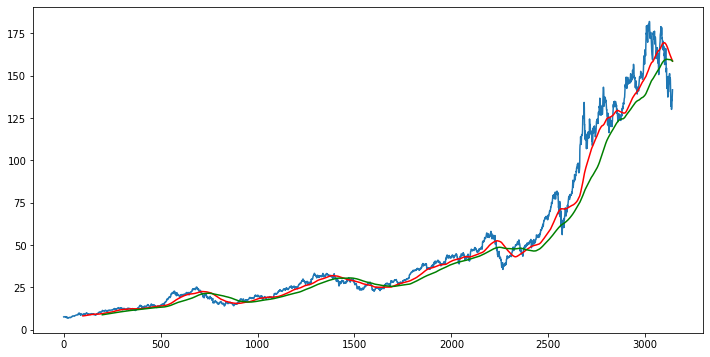

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [23]:
df.shape

(3142, 5)

In [24]:
#Splittting data into training and testing

data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2199, 1)
(943, 1)


In [25]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [26]:
data_testing.head()

,Close
2199,55.105000
2200,56.237499
2201,56.435001
2202,56.814999
2203,57.320000


In [27]:
# scaling down data in 0,1 scale 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.94674612],
       [0.96232408],
       [0.96929192]])

In [29]:
data_training_array.shape

(2199, 1)

In [30]:
 

x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
  
x_train, y_train = np.array(x_train),np.array(y_train) 

In [31]:
x_train.shape

(2099, 100, 1)

In [32]:
# ML Model

In [33]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,
               input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))





model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))





model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


# dense layer
model.add(Dense(units = 1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
66/66 [==============================] - 20s 169ms/step - loss: 0.0298
Epoch 2/50
66/66 [==============================] - 11s 164ms/step - loss: 0.0052
Epoch 3/50
66/66 [==============================] - 11s 163ms/step - loss: 0.0048
Epoch 4/50
66/66 [==============================] - 11s 167ms/step - loss: 0.0047
Epoch 5/50
66/66 [==============================] - 12s 180ms/step - loss: 0.0047
Epoch 6/50
66/66 [==============================] - 11s 165ms/step - loss: 0.0043
Epoch 7/50
66/66 [==============================] - 11s 168ms/step - loss: 0.0044
Epoch 8/50
66/66 [==============================] - 11s 165ms/step - loss: 0.0041
Epoch 9/50
66/66 [==============================] - 11s 172ms/step - loss: 0.0038
Epoch 10/50
66/66 [==============================] - 11s 172ms/step - loss: 0.0035
Epoch 11/50
66/66 [==============================] - 11s 170ms/step - loss: 0.0030
Epoch 12/50
66/66 [==============================] - 11s 168ms/step - loss: 0.0029
Epoch 13/50
6

In [37]:
model.save('keras_model.h5')

In [38]:
data_testing.head()

,Close
2199,55.105000
2200,56.237499
2201,56.435001
2202,56.814999
2203,57.320000


In [39]:
data_training.tail(100)

,Close
2099,45.957500
2100,46.290001
2101,46.512501
2102,46.840000
2103,47.509998
...,...
2194,54.592499
2195,55.007500
2196,54.415001
2197,55.197498


In [40]:

past_100_days= data_training.tail(100)

In [41]:

final_df = past_100_days.append(data_testing,ignore_index = True)

C:\Users\Nirzar Panvelkar\AppData\Local\Temp\ipykernel_15444\1430780450.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


In [42]:
final_df.head()

,Close
0,45.957500
1,46.290001
2,46.512501
3,46.840000
4,47.509998


In [43]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.07107622],
       [0.07334642],
       [0.07486558],
       ...,
       [0.68142022],
       [0.70135706],
       [0.72450291]])

In [44]:

input_data.shape

(1043, 1)

In [45]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [46]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(943, 100, 1)
(943,)


In [47]:
# making predictions

y_predicted = model.predict(x_test)

30/30 [==============================] - 2s 44ms/step


In [48]:
y_predicted.shape

(943, 1)

In [49]:
y_test

array([0.13353247, 0.14126483, 0.14261331, 0.14520781, 0.1486558 ,
       0.15341813, 0.14645388, 0.14013825, 0.13925067, 0.14454211,
       0.12660237, 0.12334215, 0.13641717, 0.1283093 , 0.13648544,
       0.13484681, 0.12602203, 0.13163779, 0.13392506, 0.13747546,
       0.12443458, 0.13247419, 0.12649996, 0.11956987, 0.1213792 ,
       0.13086968, 0.13660494, 0.1114449 , 0.10139113, 0.10511224,
       0.115661  , 0.11316891, 0.10630708, 0.08872578, 0.08541435,
       0.07614578, 0.08401469, 0.08763335, 0.07454126, 0.05938379,
       0.05904241, 0.05137833, 0.05535546, 0.05470684, 0.06614321,
       0.06377059, 0.06211488, 0.07276608, 0.0588888 , 0.05552616,
       0.04489204, 0.04678673, 0.04513101, 0.04593327, 0.04909106,
       0.03975419, 0.03712555, 0.0407613 , 0.03191943, 0.02498933,
       0.0145771 , 0.00792012, 0.02556968, 0.02382861, 0.02396517,
       0.02654264, 0.02684987, 0.        , 0.010361  , 0.00979771,
       0.01461125, 0.01898096, 0.01981736, 0.01723989, 0.01333

In [50]:
y_predicted

array([[0.19831474],
       [0.19798139],
       [0.19765595],
       [0.19739826],
       [0.19726264],
       [0.19729719],
       [0.19754618],
       [0.19801067],
       [0.19864735],
       [0.19939369],
       [0.20020026],
       [0.20097187],
       [0.2016081 ],
       [0.20206153],
       [0.20229068],
       [0.20230061],
       [0.2021151 ],
       [0.20174174],
       [0.20121191],
       [0.2005741 ],
       [0.19989252],
       [0.19918492],
       [0.19848347],
       [0.19779791],
       [0.19710869],
       [0.19639911],
       [0.19568977],
       [0.19502932],
       [0.19438511],
       [0.19368675],
       [0.19287753],
       [0.19194888],
       [0.19090971],
       [0.18976262],
       [0.18847325],
       [0.18700498],
       [0.1853154 ],
       [0.18340169],
       [0.18129882],
       [0.17902857],
       [0.17658466],
       [0.17396882],
       [0.17118143],
       [0.1682502 ],
       [0.16522124],
       [0.16218853],
       [0.1592447 ],
       [0.156

In [51]:
scaler.scale_

array([0.00682769])

In [52]:
scale_factor = 1/0.02099517
y_predicted =y_predicted*scale_factor
y_test =y_test*scale_factor

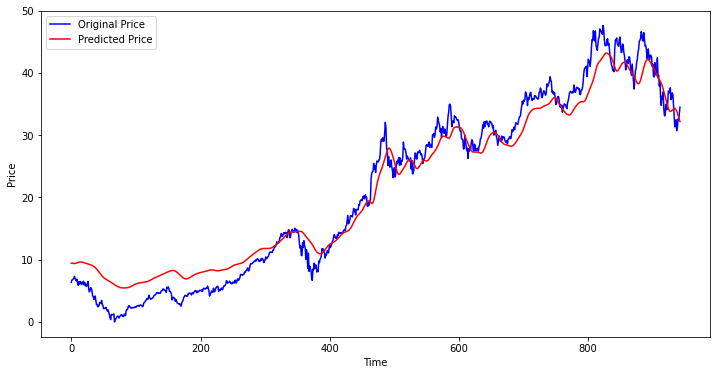

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()